In [47]:
#import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


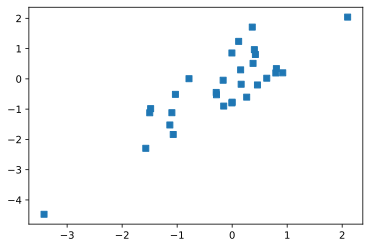

In [48]:
#create data
N = 30
x = torch.randn(N, 1)
y = x + torch.randn(N,1)/2

#plot 
plt.plot(x,y,'s')
plt.show()

In [49]:
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [50]:
#Learning rate
learningRate = 0.05

#loss function
lossfun = nn.MSELoss()

optimizer = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)

In [51]:
#train the model

numepochs = 500
losses = torch.zeros(numepochs)


#train the model

for epochi in range(numepochs):

  #forward pass
  yhat = ANNreg(x)

  #computer loss
  loss = lossfun(yhat, y)
  losses[epochi] = loss

  #backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

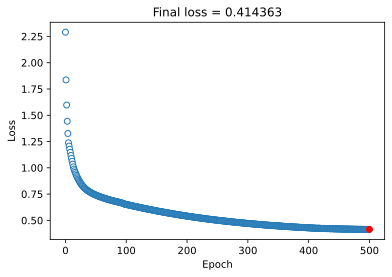

In [52]:
#manually computer loss
#final forward pass

predictions = ANNreg(x)

#final loss (MSE)
testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth = 0.1)
plt.plot(numepochs, testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [53]:
testloss

tensor(0.4144, grad_fn=<MeanBackward0>)

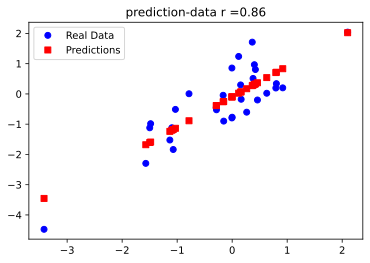

In [54]:
#Plot data
plt.plot(x,y,'bo', label ='Real Data')
plt.plot(x, predictions.detach(), 'rs', label = 'Predictions')
plt.title(f'prediction-data r ={np.corrcoef(y.T, predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()